<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 4 - Monte Carlo

### Due: Wednesday, October 7th 11:59 pm
    
</center>

Student Name: Zahra Rezaei Khavas

The purpose of this project is to study different properties of Monte Carlo methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Problem
The objective of the popular casino card game of blackjack is to obtain cards that sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21. 

Playing blackjack is naturally formulated as an **episodic** finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero, and we do not discount ($\gamma=1$); therefore these terminal rewards are also the returns. The player’s actions are to hit or to stick. The states depend on the player’s cards and the dealer’s showing card. We assume that cards are dealt from an infinite deck (i.e., with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that he could count as 11 without going bust, then the ace is said to be usable. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: his current sum (12–21), the dealer’s one showing card (ace–10), and whether or not he holds a usable ace. This makes for a total of 200 states.




**Note:** for this homework you should use the implementation of the Blackjack game and you can import it into your notebook.

In [2]:
from blackjack import BlackJack

In [3]:
## how to use the BlackJack class
def policy_player(player_sum, dealer_card1, usable_ace_player ):
    if player_sum>=20:
        return 1
    else:
        return 0

bjack = BlackJack()
first_state, reward, trajectory = bjack.play(policy_player)
print(first_state, reward, trajectory)


[False, 19, 9] -1 [[(False, 19, 9), 0]]


## Part I
Implement the **First-visit Monte Carlo prediction** algorithm. Consider the policy that sticks if the player’s sum is 20 or 21, and otherwise hits. And estimate the state-value function for this policy using the first-visit Monte Carlo prediction algorithm by simulating 500,000 blackjack games using the policy and average the returns following each state. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots). Your implementation should use the **incremental sample-average**.

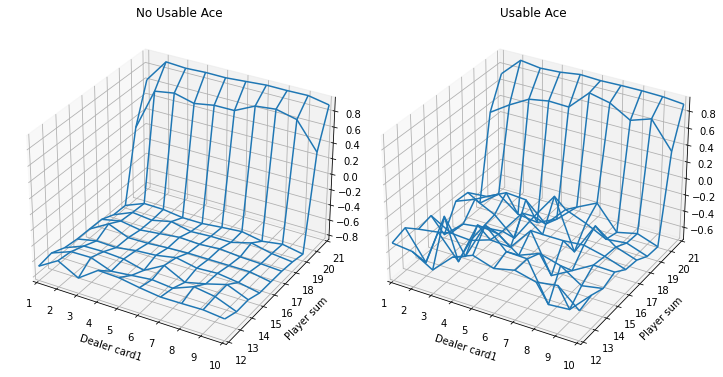

In [4]:
# Your code here
def FV_Monte_Carlo():
    num_player_sum=10
    num_dealer_card1=10
    num_usable_ace=2
    counter=0
    state_value=[]
    return_value=[]

    for x in range(num_player_sum):
        state_value.append([])
        for y in range(num_dealer_card1):
            state_value[x].append([])
            for z in range(num_usable_ace):
                state_value[x][y].append(0)
            
    for x in range(num_player_sum):
        return_value.append([])
        for y in range(num_dealer_card1):
            return_value[x].append([])
            for z in range(num_usable_ace):
                return_value[x][y].append([])
            
    while counter <=50000:
        length=0
        first_state, reward, trajectory = bjack.play(policy_player)
        i_len=len(trajectory)
        for i in range(i_len): 
            if trajectory[i][0][0]==False:
                z=0
            elif trajectory[i][0][0]==True:
                z=1
        
            xx=trajectory[i][0][1]-(12)
            yy=trajectory[i][0][2]-1
            return_value[xx][yy][z].append(reward)
            length=len(return_value[xx][yy][z]) 
            state_value[xx][yy][z]=state_value[xx][yy][z]+(reward-state_value[xx][yy][z])/length
    
    
        counter+=1
    
    return(state_value)

a=FV_Monte_Carlo()

v_Ace_False=np.empty((10, 10))
v_Ace_True=np.empty((10, 10))
for c in range(10):
    for d in range(10):
        v_Ace_False[d][c]=a[c][d][0]
        v_Ace_True[d][c]=a[c][d][1]

x = [i for i in range(12,22)]
y = [i for i in range(1,11)]
X, Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(Y, X,v_Ace_False)
ax1.set_xlabel('Dealer card1')
ax1.set_ylabel('Player sum')
ax1.set_title('No Usable Ace')
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(Y, X,v_Ace_True)
ax2.set_xlabel('Dealer card1')
ax2.set_ylabel('Player sum')
ax2.set_title('Usable Ace')
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
fig.tight_layout()

## Part II
Use the previous policy (sticks if the player’s sum is 20 or 21, and otherwise hits) as the initial policy and find (i) the action-value estimates and (ii) the optimal policy using **Monte Carlo with Exploring Starts**. To make the starting states with uniform probabilities, pick the dealer’s cards, the player’s sum, and whether or not the player has a usable ace, according to a uniform sampling process. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).

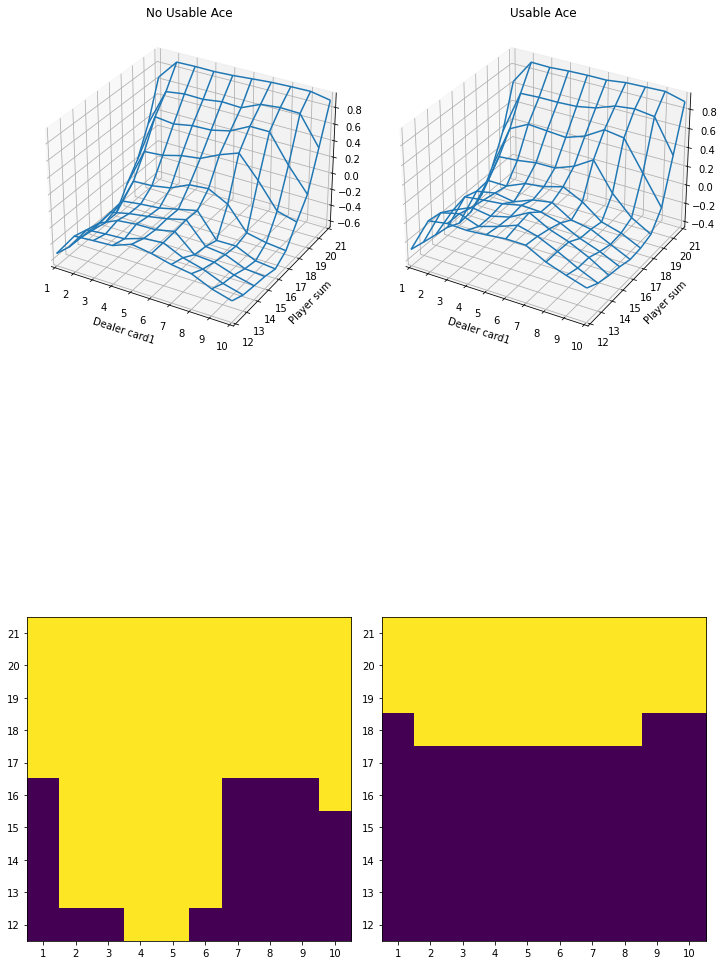

In [5]:
# Your code here
def initial_state():
    dealer_card1=np.random.choice([1,2,3,4,5,6,7,8,9,10,10,10,10])
    player_sum=np.random.choice([1,2,3,4,5,6,7,8,9,10])+11
    usable_ace_player=np.random.choice([True,False])
    return [usable_ace_player,player_sum,dealer_card1]


def ES_Monte_Carlo():
    num_player_sum=10
    num_dealer_card1=10
    num_usable_ace=2
    num_action=2
    counter=0
    state_value=[]
    action_value=[]
    return_value=[]
    policy_value=[]

    for x in range(num_player_sum):
        state_value.append([])
        for y in range(num_dealer_card1):
            state_value[x].append([])
            for z in range(num_usable_ace):
                state_value[x][y].append(0)
            
    for x in range(num_player_sum):
        return_value.append([])
        for y in range(num_dealer_card1):
            return_value[x].append([])
            for z in range(num_usable_ace):
                return_value[x][y].append([])
                for k in range(num_action):
                    return_value[x][y][z].append([])
                
    for x in range(num_player_sum):
        policy_value.append([])
        for y in range(num_dealer_card1):
            policy_value[x].append([])
            for z in range(num_usable_ace):
                policy_value[x][y].append(0)

                
    for x in range(num_player_sum):
        action_value.append([])
        for y in range(num_dealer_card1):
            action_value[x].append([])
            for z in range(num_usable_ace):
                action_value[x][y].append([])
                for k in range(num_action):
                    action_value[x][y][z].append(0)

    while counter<=500000:
        counter+=1 
        def policy(p_sum,card1,Ace):
            if Ace==True:
                Ace=1
            else:
                Ace=0
            card1=card1-1
            p_sum=p_sum-12
            chosen_policy=policy_value[p_sum][card1][Ace]
            return chosen_policy
        new_state=initial_state()
        new_action=np.random.choice([0,1])
        
        bjack = BlackJack()
        first_state, reward, trajectory = bjack.play(policy,new_state,new_action)
        i_len=len(trajectory)
        for i in range(i_len): 
            if trajectory[i][0][0]==False:
                z=0
            elif trajectory[i][0][0]==True:
                z=1
            

            xx=trajectory[i][0][1]-12
            yy=trajectory[i][0][2]-1
            action=trajectory[i][1]
            return_value[xx][yy][z][action].append(reward)
            length=len(return_value[xx][yy][z][action])
            action_value[xx][yy][z][action]=action_value[xx][yy][z][action]+(reward-action_value[xx][yy][z][action])/length
            policy_value[xx][yy][z]=np.argmax(action_value[xx][yy][z])
            
    for row in range(num_player_sum):
        for col in range(num_dealer_card1):
            for depth in range(num_usable_ace):
                state_value[row][col][depth]=max(action_value[row][col][depth])
        
        
    return state_value,policy_value 
state_value,policy_value = ES_Monte_Carlo()


###plot
v_Ace_False=np.empty((10, 10))
v_Ace_True=np.empty((10, 10))
pi_Ace_False=np.empty((10, 10))
pi_Ace_True=np.empty((10, 10))
for i in range(10):
    for j in range(10):
        v_Ace_False[j][i]=state_value[i][j][0]
        v_Ace_True[j][i]=state_value[i][j][1]
        pi_Ace_False[9-j][i]=policy_value[j][i][0]
        pi_Ace_True[9-j][i]=policy_value[j][i][1]


fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(221, projection='3d')

ax1.plot_wireframe(Y, X,v_Ace_False)
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)
ax1.set_xlabel('Dealer card1')
ax1.set_ylabel('Player sum')
ax1.set_title('No Usable Ace')

ax2 = fig.add_subplot(222, projection='3d')

ax2.plot_wireframe(Y, X,v_Ace_True)
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
ax2.set_xlabel('Dealer card1')
ax2.set_ylabel('Player sum')
ax2.set_title('Usable Ace')

y = ["21", "20", "19", "18","17", "16", "15", "14", "13", "12"]
x = ["1", "2", "3","4", "5", "6", "7", "8", "9", "10"]

ax3=fig.add_subplot(223)
ax3.imshow(pi_Ace_False)
ax3.set_xticks(np.arange(len(x)))
ax3.set_yticks(np.arange(len(y)))
ax3.set_xticklabels(x)
ax3.set_yticklabels(y)

ax4=fig.add_subplot(224) 
ax4.imshow(pi_Ace_True)
ax4.set_xticks(np.arange(len(x)))
ax4.set_yticks(np.arange(len(y)))
ax4.set_xticklabels(x)
ax4.set_yticklabels(y)
fig.tight_layout()

## Part III
Extend your algorithm to the **off-policy Monte Carlo control with weighted importance sampling** and estimate action-values and the target policy. You need to consider an arbitrary soft behavior policy. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).

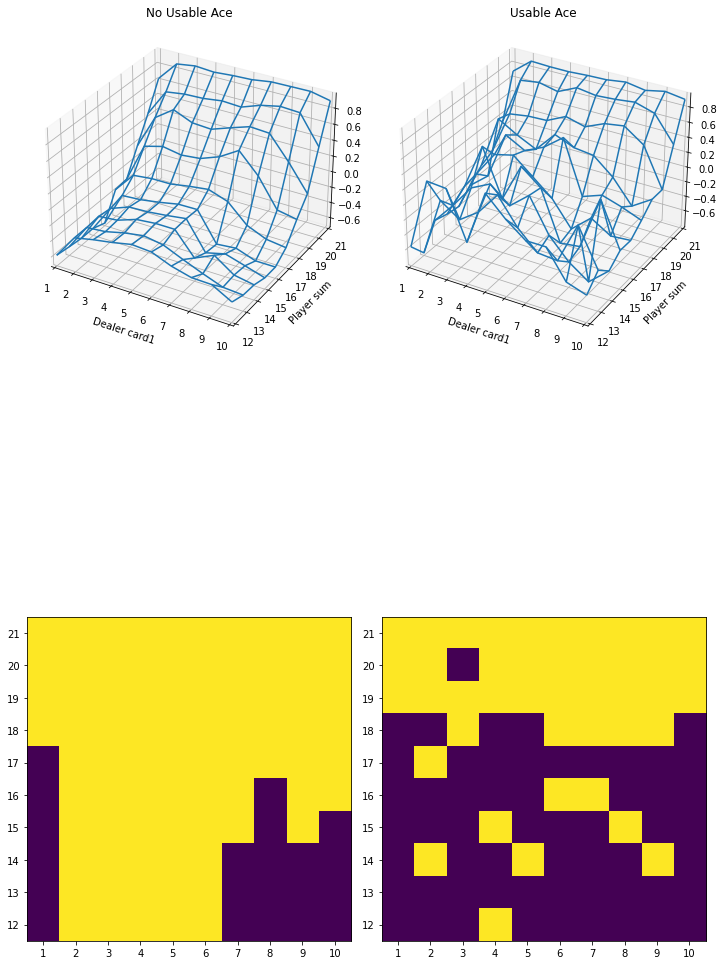

In [28]:
def off_pi_Monte_Carlo():
    num_player_sum=10
    num_dealer_card1=10
    num_usable_ace=2
    num_action=2
    counter=0
    state_value=[]
    action_value=[]
    C_value=[]
    policy_value=[]

    for x in range(num_player_sum):
        state_value.append([])
        for y in range(num_dealer_card1):
            state_value[x].append([])
            for z in range(num_usable_ace):
                state_value[x][y].append(0)
            
    for x in range(num_player_sum):
        C_value.append([])
        for y in range(num_dealer_card1):
            C_value[x].append([])
            for z in range(num_usable_ace):
                C_value[x][y].append([])
                for k in range(num_action):
                    C_value[x][y][z].append(0)
                
    for x in range(num_player_sum):
        policy_value.append([])
        for y in range(num_dealer_card1):
            policy_value[x].append([])
            for z in range(num_usable_ace):
                policy_value[x][y].append(np.random.choice([0,1]))

                
    for x in range(num_player_sum):
        action_value.append([])
        for y in range(num_dealer_card1):
            action_value[x].append([])
            for z in range(num_usable_ace):
                action_value[x][y].append([])
                for k in range(num_action):
                    action_value[x][y][z].append(0)

    while counter<=500000:
        counter+=1 
        def behavior(p_sum,card1,Ace):
            p=np.random.rand(1)
            if p<0.1:
                flag=0
            else:
                flag=1   
            return flag
       
        bjack = BlackJack()
        first_state, reward, trajectory = bjack.play(behavior)
        
        W=1
        
        i_len=len(trajectory)
        for i in range(i_len): 
            if trajectory[i][0][0]==False:
                z=0
            elif trajectory[i][0][0]==True:
                z=1
            
            xx=trajectory[i][0][1]-12
            yy=trajectory[i][0][2]-1
            action=trajectory[i][1]
            C_value[xx][yy][z][action]=C_value[xx][yy][z][action]+W
            action_value[xx][yy][z][action]=action_value[xx][yy][z][action]+(reward-action_value[xx][yy][z][action])*(W/C_value[xx][yy][z][action])
            if action_value[xx][yy][z][0]==action_value[xx][yy][z][1]:
                policy_value[xx][yy][z]=np.random.choice([0,1])
            else:               
                policy_value[xx][yy][z]=np.argmax(action_value[xx][yy][z])
            if action!= policy_value[xx][yy][z]:
                break
            if action==0:
                W=10*W
            else:
                W=10*W/9
            
    for row in range(num_player_sum):
        for col in range(num_dealer_card1):
            for depth in range(num_usable_ace):
                state_value[row][col][depth]=max(action_value[row][col][depth])
        
        
    return state_value,policy_value 
state_value,policy_value = off_pi_Monte_Carlo()

###plot
v_Ace_False=np.empty((10, 10))
v_Ace_True=np.empty((10, 10))
pi_Ace_False=np.empty((10, 10))
pi_Ace_True=np.empty((10, 10))
for i in range(10):
    for j in range(10):
        v_Ace_False[j][i]=state_value[i][j][0]
        v_Ace_True[j][i]=state_value[i][j][1]
        pi_Ace_False[9-j][i]=policy_value[j][i][0]
        pi_Ace_True[9-j][i]=policy_value[j][i][1]


fig = plt.figure(figsize=(10,20))

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_wireframe(Y, X,v_Ace_False)
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)
ax1.set_xlabel('Dealer card1')
ax1.set_ylabel('Player sum')
ax1.set_title('No Usable Ace')

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_wireframe(Y, X,v_Ace_True)
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
ax2.set_xlabel('Dealer card1')
ax2.set_ylabel('Player sum')
ax2.set_title('Usable Ace')

y = ["21", "20", "19", "18","17", "16", "15", "14", "13", "12"]
x = ["1", "2", "3","4", "5", "6", "7", "8", "9", "10"]

ax3=fig.add_subplot(223)
ax3.imshow(pi_Ace_False)
ax3.set_xticks(np.arange(len(x)))
ax3.set_yticks(np.arange(len(y)))
ax3.set_xticklabels(x)
ax3.set_yticklabels(y)

ax4=fig.add_subplot(224) 
ax4.imshow(pi_Ace_True)
ax4.set_xticks(np.arange(len(x)))
ax4.set_yticks(np.arange(len(y)))
ax4.set_xticklabels(x)
ax4.set_yticklabels(y)
fig.tight_layout()

Answer the following questions:

a.	What behavior policy did you select? Why does it make sense?
> Answer I chose epsilon gridi policy. In my policy the algorithm decides to chose STAY for 90% of the situations and this policy has the coverage over all possible actions in all states. 

b.	How does the obtained target policy in this part compare to the target policies in parts I and II? Is it different? Why? 
> Answer as it can be seen in the figures, in chosen policy for part I the chance of winning was lower as the algorithm stops hiting only for state 20 and 21 which increase the chance of getting busted, however, in policy chosen in part II the results merge to the optimal policy sooner as it chose action more goal oriented compared to the policy chosen in part III (epsiolon greedy) that choos actions blindly.